In [1]:
import uuid
import random

In [2]:
PD_scores = {'CC': 3,
     'DC': 5,
     'CD': 0,
     'DD': 1}

In [3]:
class Tit4Tat_Agent:
    def __init__(self, id, init_wealth, random_error_rate=0):
        self.id = id
        self.type = 'T4T'
        self.init_wealth = init_wealth
        self.score = 0
        self.history = {}
        self.my_plays = []
        self.active = True
        self.random_error_rate = random_error_rate
        
        
    def make_decision(self, opponent):
        if self.id in opponent.history.keys():
            if random.random() < 1-self.random_error_rate:
                return opponent.history[self.id][-1]
            else:
                if opponent.history[self.id][-1] == 'D':
                    return 'C'
                else:
                    return 'D'
        else:
            if random.random() < 1-self.random_error_rate:
                return 'C'
            else:
                return 'D'
        
    def add_history(self, agent, opponent, opponent_decision):
        if opponent.id in self.history.keys():
            agent.history[opponent.id].append(opponent_decision)
        else:
            agent.history[opponent.id] = [opponent_decision]
        
        
    def check_status(self):
        if self.score+self.init_wealth <= 0:
            self.active=False

In [4]:
class AlwaysCoop_Agent:
    def __init__(self, id, init_wealth, random_error_rate=0):
        self.id = id
        self.type = 'always_coop'
        self.init_wealth = init_wealth
        self.score = 0
        self.history = {}
        self.my_plays = []
        self.active = True
        self.random_error_rate = random_error_rate
    
    def make_decision(self, opponent):
            return 'C'
        
    def add_history(self, agent, opponent, opponent_decision):
        if opponent.id in self.history.keys():
            agent.history[opponent.id].append(opponent_decision)
        else:
            agent.history[opponent.id] = [opponent_decision]
            
    def check_status(self):
        if self.score+self.init_wealth <= 0:
             self.active=False
        

In [5]:
class AlwaysDefect_Agent:
    def __init__(self, id, init_wealth, random_error_rate):
        self.id = id
        self.type = 'always_defect'
        self.init_wealth = init_wealth
        self.score = 0
        self.history = {}
        self.my_plays = []
        self.active = True
        self.random_error_rate = random_error_rate
    
    def make_decision(self, opponent):
            return 'D'
        
    def add_history(self, agent, opponent, opponent_decision):
        if opponent.id in self.history.keys():
            agent.history[opponent.id].append(opponent_decision)
        else:
            agent.history[opponent.id] = [opponent_decision]
            
    def check_status(self):
        if self.score+self.init_wealth <= 0:
            self.active=False
        

In [6]:
class Grudger_Agent:
     def __init__(self, id, init_wealth, random_error_rate=0):
        self.id = id
        self.type = 'grudger'
        self.init_wealth = init_wealth
        self.score = 0
        self.history = {}
        self.my_plays = []
        self.active = True
        self.random_error_rate = random_error_rate
        
     def make_decision(self, opponent):
        if self.id in opponent.history.keys():
            if 'D' in opponent.history[self.id]:
                return 'D'
            else:
                return 'C'
        else:
            return 'C'
    
     def add_history(self, agent, opponent, opponent_decision):
        if opponent.id in self.history.keys():
            agent.history[opponent.id].append(opponent_decision)
        else:
            agent.history[opponent.id] = [opponent_decision]
            
    
     def check_status(self):
        if self.score+self.init_wealth <= 0:
            self.active=False
        

In [7]:
class Detective_Agent:
    def __init__(self, id, init_wealth, random_error_rate=0):
        self.id = id
        self.type = 'detective'
        self.init_wealth = init_wealth
        self.score = 0
        self.history = {}
        self.my_plays = []
        self.active = True
        self.random_error_rate = random_error_rate
        
    def make_decision(self, opponent):
        if self.id in opponent.history.keys():
            turn_num = len(opponent.history[self.id])
        else:
            return 'C'
        if turn_num == 1:
            return 'D'
        elif turn_num == 2:
            return 'C'
        elif turn_num == 3:
            return 'C'
        else:
            if 'D' in opponent.history[self.id]:
                return opponent.history[self.id][-1]
            else:
                return 'D'
            
    def add_history(self, agent, opponent, opponent_decision):
        if opponent.id in self.history.keys():
            agent.history[opponent.id].append(opponent_decision)
        else:
            agent.history[opponent.id] = [opponent_decision]

    def check_status(self):
        if self.score+self.init_wealth <= 0:
            self.active=False

In [8]:
class Forgiving_Tit4Tat_Agent:
    def __init__(self, id, init_wealth, random_error_rate = 0):
        self.id = id
        self.type = 'Forgiving_T4T'
        self.init_wealth = init_wealth
        self.score = 0
        self.history = {}
        self.my_plays = []
        self.active = True
        self.random_error_rate = random_error_rate
        
        
    def make_decision(self, opponent):
        if self.id in opponent.history.keys():
            if opponent.history[self.id][:-2] ==  ['D','D']:
                return 'D'
            else:
                return 'C'
        else:
            return 'C' 
        
    def add_history(self, agent, opponent, opponent_decision):
        if opponent.id in self.history.keys():
            agent.history[opponent.id].append(opponent_decision)
        else:
            agent.history[opponent.id] = [opponent_decision]
            
    def check_status(self):
        if self.score+self.init_wealth <= 0:
            self.active=False
        

In [9]:
def agent_factory(agent_type, id, init_wealth, random_error_rate=0):
    if agent_type == 'T4T':
        return Tit4Tat_Agent(id, init_wealth, random_error_rate=random_error_rate)
    elif agent_type == 'always_coop':
        return AlwaysCoop_Agent(id, init_wealth, random_error_rate=random_error_rate)
    elif agent_type == 'always_defect':
        return AlwaysDefect_Agent(id, init_wealth, random_error_rate=random_error_rate)
    elif agent_type == 'grudger':
        return Grudger_Agent(id, init_wealth, random_error_rate=random_error_rate)
    elif agent_type == 'detective':
        return Detective_Agent(id, init_wealth, random_error_rate=random_error_rate)
    elif agent_type == 'Forgiving_T4T':
        return Forgiving_Tit4Tat_Agent(id, init_wealth, random_error_rate=random_error_rate)

In [10]:
class Game:
    def __init__(self, cost2play, num_agents,agent_type,num_rounds=None, random_error_rate=0):
        self.cost2play = cost2play
        self.num_agents = num_agents
        self.agent_type = agent_type
        self.agents = self.create_agents(self.num_agents, self.agent_type, random_error_rate=random_error_rate)
        
    def create_agents(self,num_agents, agent_type, random_error_rate=0):
        agents = []
        for n in range(num_agents):
            agent_id  = uuid.uuid4()
            initial_wealth = random.randint(40,400)
            agent = agent_factory(agent_type,agent_id,initial_wealth, random_error_rate=random_error_rate)
            agents.append(agent)
        return agents
    
    
    def play_round(self, agent, opponent):
        agent_decision = agent.make_decision(opponent)
        opponent_decision = opponent.make_decision(agent)
        agent.add_history(agent, opponent, opponent_decision)
        opponent.add_history(opponent, agent, agent_decision)
        agent.my_plays.append(agent_decision)
        opponent.my_plays.append(opponent_decision)
        #print(agent_decision+opponent_decision)
        agent.score += PD_scores[agent_decision+opponent_decision] - self.cost2play
        opponent.score += PD_scores[agent_decision+opponent_decision] - self.cost2play
        agent.check_status()
        opponent.check_status()
        
        
        
    
    def game_play(self):
        num_active = self.num_agents
        while num_active > 1:
            
            for i in range(self.num_agents):
                if self.agents[i].active:
                    for j in range(self.num_agents):
                        if self.agents[j].active:
                            if i != j:
                                self.play_round(self.agents[i], self.agents[j])
                        else:
                            continue
                else:
                    continue
            count_active = 0
            for agent in self.agents:
                if agent.active:
                    count_active += 1
            num_active = count_active
            
            

In [347]:
agent_types = ["T4T","always_coop","always_defect","grudger","detective","Forgiving_T4T"]
class Game_mixed:
    def __init__(self, cost2play, num_agents,num_rounds=None, random_error_rate=0):
        self.cost2play = cost2play
        self.num_agents = num_agents
        self.agent_type = "mixed"
        self.agent_type_list = [agent_types[random.randint(0,5)] for i in range(self.num_agents)]
        self.agents = self.create_agents(self.num_agents, self.agent_type_list, random_error_rate=random_error_rate)
        
    def create_agents(self,num_agents, agent_type_list, random_error_rate=0):
        agents = []
        for n in range(num_agents):
            agent_id  = uuid.uuid4()
            initial_wealth = random.randint(8000,12000)
            agent = agent_factory(agent_type_list[n],agent_id,initial_wealth, random_error_rate=random_error_rate)
            agents.append(agent)
        return agents
    
    
    def play_round(self, agent, opponent):
        agent_decision = agent.make_decision(opponent)
        opponent_decision = opponent.make_decision(agent)
        agent.add_history(agent, opponent, opponent_decision)
        opponent.add_history(opponent, agent, agent_decision)
        agent.my_plays.append(agent_decision)
        opponent.my_plays.append(opponent_decision)
        #print(agent_decision+opponent_decision)
        agent.score += PD_scores[agent_decision+opponent_decision] - self.cost2play
        opponent.score += PD_scores[agent_decision+opponent_decision] - self.cost2play
        agent.check_status()
        opponent.check_status()
        
        
        
    
    def game_play(self):
        num_active = self.num_agents
        while num_active > 1:
            
            for i in range(self.num_agents):
                if self.agents[i].active:
                    for j in range(self.num_agents):
                        if self.agents[j].active:
                            if i != j:
                                self.play_round(self.agents[i], self.agents[j])
                        else:
                            continue
                else:
                    continue
            count_active = 0
            for agent in self.agents:
                if agent.active:
                    count_active += 1
            num_active = count_active
            
            

In [348]:
mixed_game = Game_mixed(4,100)
mixed_game.game_play()

In [11]:
game = Game(4, 10, 'detective')
game.game_play()

In [12]:
def get_stats(game):
    length_of_play = []
    init_wealth_list = []

    for agent in game.agents:
        length_of_play.append(len(agent.my_plays))
        init_wealth_list.append(agent.init_wealth)

    init_wealth_list, length_of_play = zip(*sorted(zip(init_wealth_list, length_of_play)))
    
    return length_of_play, init_wealth_list

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
def plot(game):
    length_of_play, init_wealth_list = get_stats(game)
    plt.title(game.agent_type)
    plt.plot(init_wealth_list, label="init_wealth")
    plt.plot(length_of_play, label="rounds played")
    plt.legend()

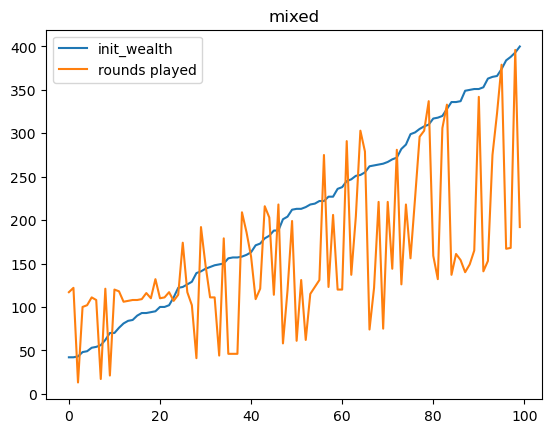

In [179]:
plot(mixed_game)

In [35]:
import numpy as np

<BarContainer object of 6 artists>

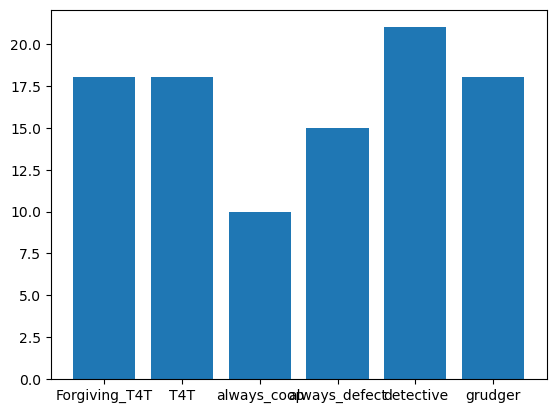

In [328]:
types = []
for agent in mixed_game.agents:
    types.append(agent.type)

keys, counts = np.unique(types, return_counts=True)
plt.bar(keys, counts)

In [164]:
def get_stats_by_type(game):
    length_of_play = []
    init_wealth_list = []

    for i in range(game.num_agents):
        length_of_play.append((len(game.agents[i].my_plays),game.agents[i].type))
        init_wealth_list.append(game.agents[i].init_wealth)
    
    init_wealth_list, length_of_play = zip(*sorted(zip(init_wealth_list, length_of_play)))
    
    return length_of_play, init_wealth_list

In [215]:
#agent_types = ["T4T","always_coop","always_defect","grudger","detective","Forgiving_T4T"]
colors = ['red','yellow','blue','green','pink','black']
def plot_by_type(game):
    length_of_play, init_wealth_list = get_stats_by_type(game)
    length_lists = []
    wealth_lists = []
    index_lists = []
    for agent_type in agent_types:
        length_of_play_per_type = []
        init_wealth_list_per_type = []
        index_list = []
        for i in range(len(length_of_play)):
            if length_of_play[i][1] == agent_type:
                length_of_play_per_type.append(length_of_play[i][0])
                init_wealth_list_per_type.append(init_wealth_list[i])
                index_list.append(i)
        length_lists.append(length_of_play_per_type)
        wealth_lists.append(init_wealth_list_per_type)
        index_lists.append(index_list)
    for n in range(len(length_lists)):
        #print(len(length_lists[n]))
        #print(len(index_lists[n]))
        plt.scatter(index_lists[n], length_lists[n], color=colors[n], label=agent_types[n])
        plt.title(game.agent_type)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        a, b = np.polyfit(index_lists[n], length_lists[n], 1)
        

    #plt.plot(init_wealth_list, label="init_wealth")
    #plt.plot(length_of_play, label="rounds played")
    #plt.legend()

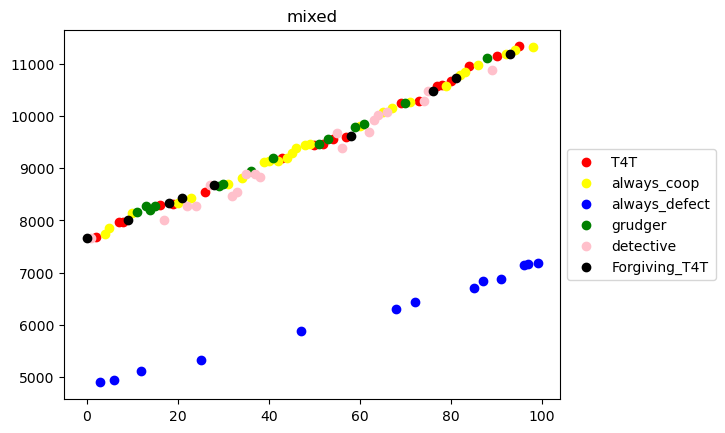

In [349]:
plot_by_type(mixed_game)

In [240]:
plot_by_type(mixed_game, "always_coop")

TypeError: plot_by_type() takes 1 positional argument but 2 were given

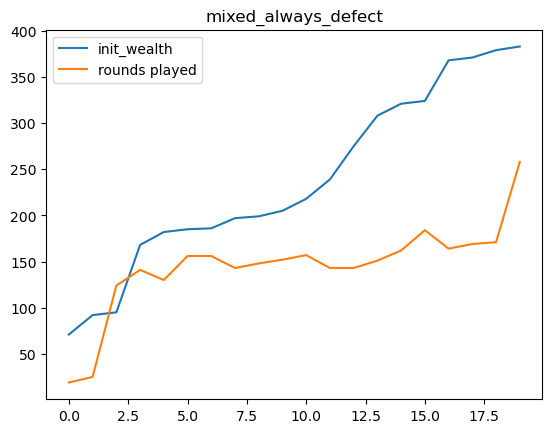

In [76]:
plot_by_type(mixed_game, "always_defect")

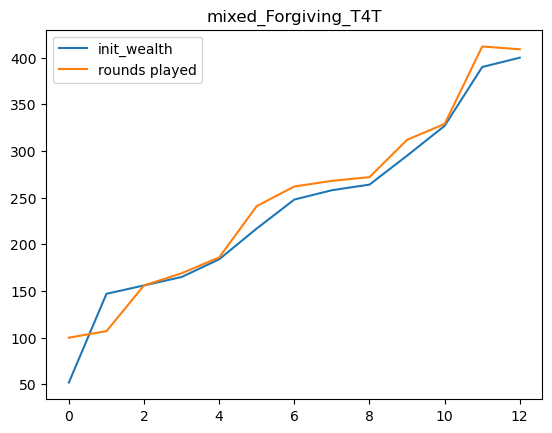

In [77]:
plot_by_type(mixed_game, "Forgiving_T4T")

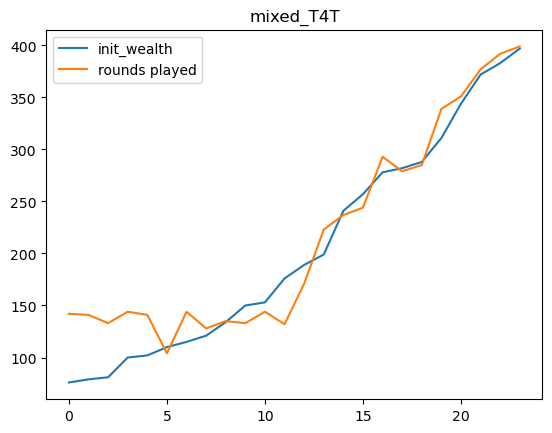

In [78]:
plot_by_type(mixed_game, "T4T")

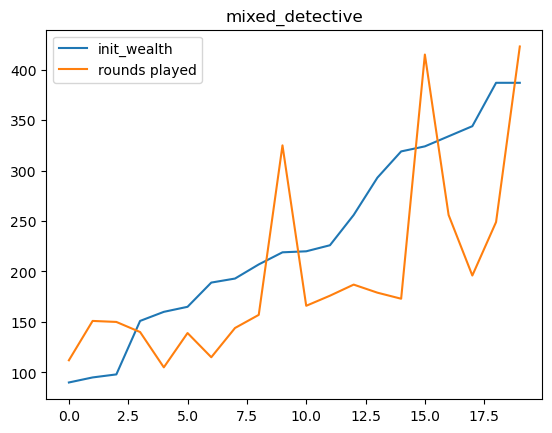

In [79]:
plot_by_type(mixed_game, "detective")

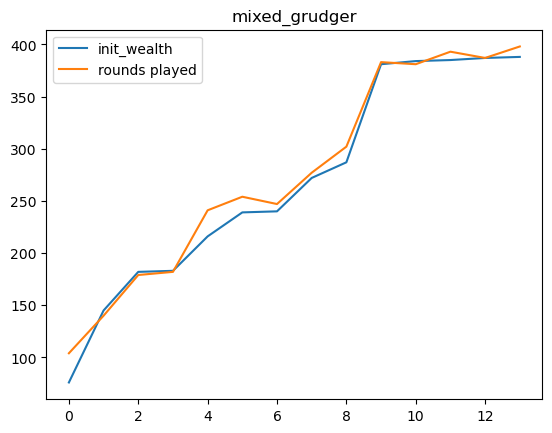

In [80]:
plot_by_type(mixed_game, "grudger")

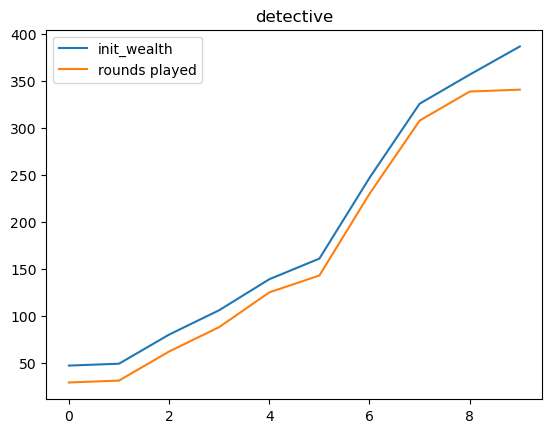

In [15]:
plot(game)

In [16]:
game_T4T = Game(4, 10, 'T4T', random_error_rate=0)
game_T4T.game_play()

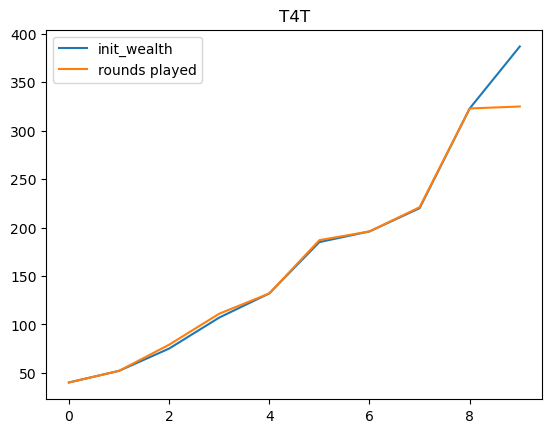

In [17]:
plot(game_T4T)

In [18]:
game_defect = Game(4, 10, 'always_defect')
game_defect.game_play()

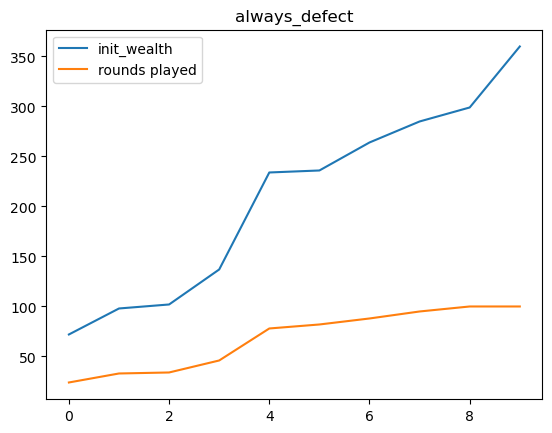

In [19]:
plot(game_defect)

In [20]:
game_coop = Game(4, 10, 'always_coop')
game_coop.game_play()

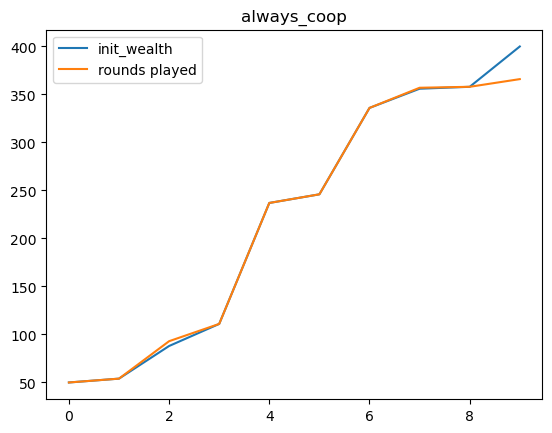

In [21]:
plot(game_coop)

In [22]:
game_grudger = Game(4, 10, 'grudger')
game_grudger.game_play()

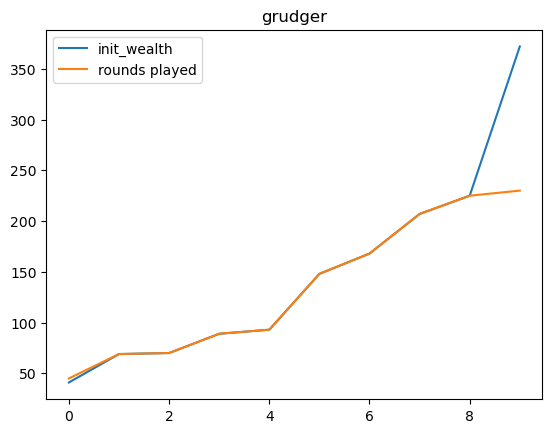

In [23]:
plot(game_grudger)

In [24]:
game_forgiving_T4T = Game(4, 10, 'Forgiving_T4T')
game_forgiving_T4T.game_play()

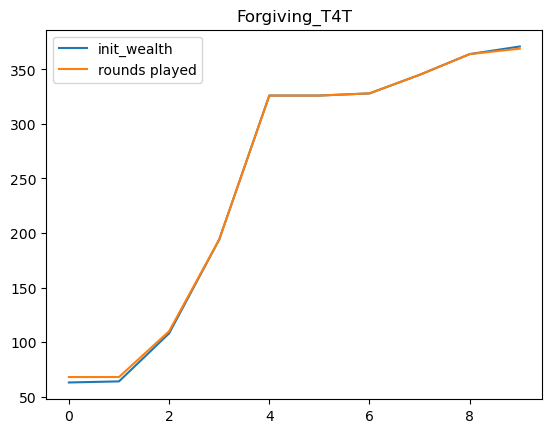

In [25]:
plot(game_forgiving_T4T)